# Analysis of Covid-19 Data in Ireland in conjuction with NRA Traffic Data
In this notebook, we do exploratory analysis on https://data.gov.ie/dataset Covid-19 data, which provides the total cases per day on a county basis. We then compare this data to public road traffic volume data from https://www.nratrafficdata.ie/ to explore whether they may be a link between changes in traffic and the spread of Coronavirus in Ireland

### Import relevant packages

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

### Import formatted Covid data

In [23]:
weekCountyStats = pd.read_csv("/work/countyDailyCases.csv", parse_dates=[0], index_col=0)

### Import NRA Traffic Data

In [24]:
# Traffic Data
GalwayN83 = pd.read_csv("/work/Road Data/traffic_data/NRA_000000001069.csv", parse_dates=[0], index_col=0)
LetterKenny_Lifford = pd.read_csv("/work/Road Data/traffic_data/NRA_000000001132.csv", parse_dates=[0], index_col=0)
Cork_RingRoad = pd.read_csv("/work/Road Data/traffic_data/NRA_000000001253.csv", parse_dates=[0], index_col=0)
DublinRoad = pd.read_csv("/work/Road Data/traffic_data/NRA_000000001503.csv", parse_dates=[0], index_col=0)
KildareRoad = pd.read_csv("/work/Road Data/traffic_data/NRA_000000020075.csv", parse_dates=[0], index_col=0)
WestmeathRoad = pd.read_csv("/work/Road Data/traffic_data/NRA_000000020044.csv", parse_dates=[0], index_col=0)

### Daily Covid Cases by County

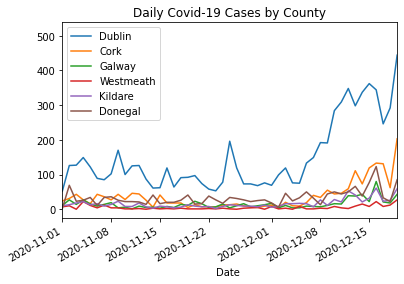

In [87]:
weekCountyStats.plot()
plt.title("Daily Covid-19 Cases by County")
plt.xlim([datetime.date(2020, 11, 1), datetime.date(2020, 12, 19)])
plt.savefig(f'images/Daily Covid-19 Cases by County.png')

### Daily Covid Cases in Dublin

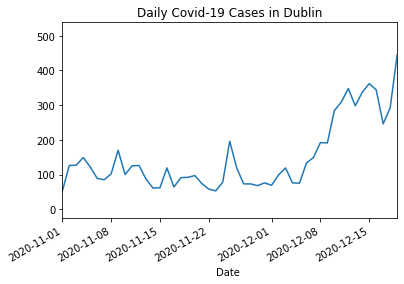

In [88]:
weekCountyStats["Dublin"].plot()
plt.title("Daily Covid-19 Cases in Dublin")
plt.xlim([datetime.date(2020, 11, 1), datetime.date(2020, 12, 19)])
plt.savefig(f'images/Daily Dublin before MA.png')

### Daily Covid Cases in Dublin, after 7 day simple moving average is applied

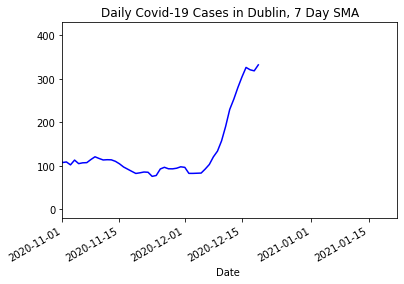

In [92]:
import datetime
weekCountyStats["Dublin"].rolling(window=7).mean().plot(label="Cases", color="blue")
plt.title("Daily Covid-19 Cases in Dublin, 7 Day SMA")
plt.xlim([datetime.date(2020, 11, 1), datetime.date(2021, 1, 22)])
plt.savefig(f'images/for danning.png')

### Comparison of Covid-19 Cases vs. NRA Traffic Volume

Galway
Dublin
Cork
Kildare
Westmeath
Donegal


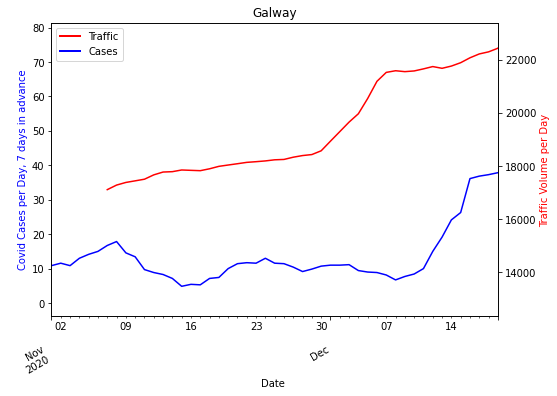

<Figure size 432x288 with 0 Axes>

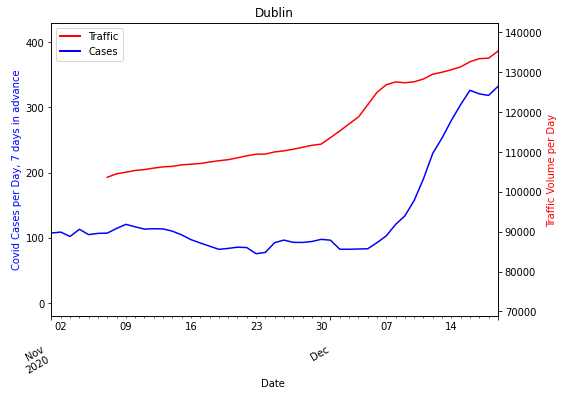

<Figure size 432x288 with 0 Axes>

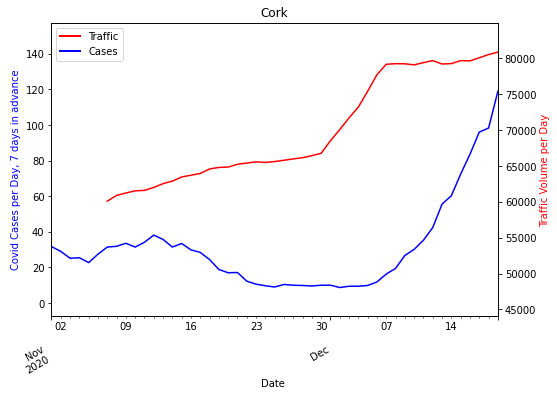

<Figure size 432x288 with 0 Axes>

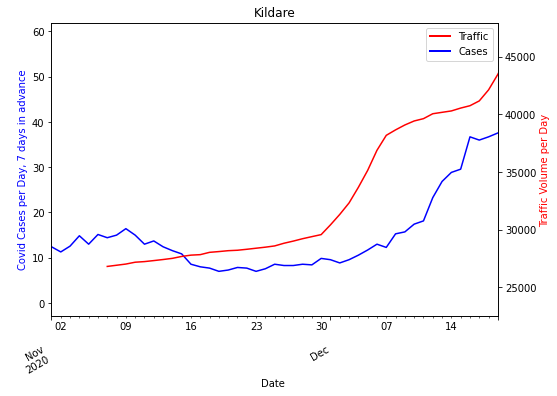

<Figure size 432x288 with 0 Axes>

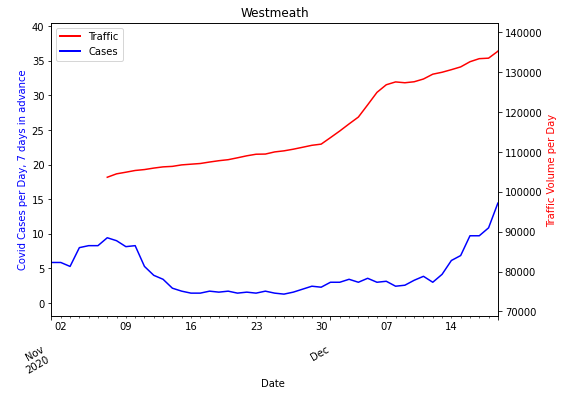

<Figure size 432x288 with 0 Axes>

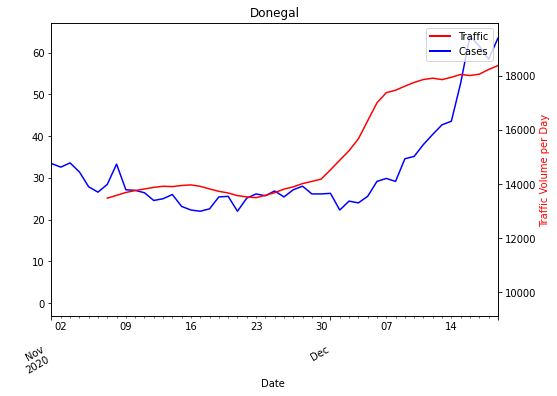

<Figure size 432x288 with 0 Axes>

In [90]:
countyDict = {
   "Galway":GalwayN83,
    "Dublin":DublinRoad,
    "Cork":Cork_RingRoad,
    "Kildare":KildareRoad,
    "Westmeath":WestmeathRoad,
    "Donegal":LetterKenny_Lifford,
}

#fig, axs = plt.subplots(2, 2)

for county, road in countyDict.items():
    print(county)
    ## Dublin  

    road["SMA_7"] = road.rolling(window=7).mean()
    road = road[ road.index < "2020-12-31"]

    plt.figure(figsize=(8, 6))
    ax = plt.gca()
    x1.set_ylabel('Covid Cases per Day, 7 days in advance', color='b')
    x1 = weekCountyStats[county].rolling(window=7).mean().plot(label="Cases", color="blue")

    #x1 = donegal.ConfirmedCovidCases.diff().plot(label="Cases", color="blue")

    ax2 = ax.twinx()
    ax2.spines['right'].set_position(('axes', 1.0))
    road["SMA_7"].plot(ax=ax2, color="red", label="Traffic")

    from matplotlib.lines import Line2D
    lines = [Line2D([0], [0], color="red", lw=2),
            Line2D([0], [0], color="blue", lw=2)]
    ax2.set_ylabel('Traffic Volume per Day', color='r')
    ax2.legend(lines, ["Traffic", "Cases"])

    plt.title(county)
    plt.xlim([datetime.date(2020, 11, 1), datetime.date(2020, 12, 19)])
    plt.savefig(f'images/{county}.png')
    plt.figure()
    